# 读取数据

In [4]:
import sys

sys.executable

'/root/first_env/bin/python'

In [5]:
import os

os.listdir()

['.ipynb_checkpoints',
 '1. Titanic数据预处理.ipynb',
 'gender_submission.csv',
 'train.csv',
 '.git',
 'test.csv',
 'README.md']

In [7]:
import pandas as pd

In [130]:
train = pd.read_csv('train.csv')

In [8]:
test = pd.read_csv('test.csv')

# 处理数据

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [78]:
train1 = train.copy()

## 删除并填补缺失值

In [79]:
train1['Age'].fillna(train['Age'].median(), inplace=True)

In [80]:
train1['Age'].isnull().any()

False

In [81]:
train1['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [82]:
drop_colums = ['PassengerId', 'Cabin', 'Ticket']

In [83]:
train1.drop(drop_colums, axis='columns', inplace=True)

In [84]:
train1.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## 创建新的特征

从名字中提取特征

In [85]:
import re
r = re.compile(', (\w+).')
train1['Name'] = train1['Name'].apply(lambda x: r.findall(x)[0])

In [86]:
train1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


In [89]:
d = dict(train1['Name'].value_counts() < 10)

In [90]:
d

{'Mr': False,
 'Miss': False,
 'Mrs': False,
 'Master': False,
 'Dr': True,
 'Rev': True,
 'Col': True,
 'Mlle': True,
 'Major': True,
 'Capt': True,
 'Ms': True,
 'Mme': True,
 'Don': True,
 'the': True,
 'Sir': True,
 'Jonkheer': True,
 'Lady': True}

In [92]:
min_num = 10
train1['Name'] = train1['Name'].apply(lambda x: 'Misc' if d[x] else x)
# labmda x 后面是返回的对象，每次传x进去，返回对象

In [94]:
train1['Name'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Name, dtype: int64

In [95]:
train1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


创建特征，家庭成员大小，和是否独自一人

In [96]:
train1['Family_size'] = train1['SibSp'] + train1['Parch']

In [97]:
train1['Family_size'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_size, dtype: int64

In [98]:
train1['IsAlone'] = train1['Family_size'].apply(lambda x: False if x else True)

In [99]:
train1['IsAlone'].value_counts()

True     537
False    354
Name: IsAlone, dtype: int64

In [100]:
train1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,IsAlone
0,0,3,Mr,male,22.0,1,0,7.2500,S,1,False
1,1,1,Mrs,female,38.0,1,0,71.2833,C,1,False
2,1,3,Miss,female,26.0,0,0,7.9250,S,0,True
3,1,1,Mrs,female,35.0,1,0,53.1000,S,1,False
4,0,3,Mr,male,35.0,0,0,8.0500,S,0,True


将Age和Fare进行分类，区间分类

加astype和不加有什么区别吗

In [106]:
# train1['Age']
pd.cut(train1['Age'].astype(int), 5).dtypes

CategoricalDtype(categories=[(-0.08, 16.0], (16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (64.0, 80.0]],
              ordered=True)

In [115]:
pd.cut(train1['Age'].astype(int), 5)

0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
886    (16.0, 32.0]
887    (16.0, 32.0]
888    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [116]:
pd.cut(train1['Age'], 5)

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888    (16.336, 32.252]
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [118]:
train1['New_age'] = pd.cut(train1['Age'].astype(int), 5)

In [121]:
train1['New_Fare'] = pd.qcut(train1['Fare'], 4)

使用one hot编码

In [125]:
train1 = pd.get_dummies(train1, columns=['Name', 'Sex', 'Embarked'], prefix=['Name', 'Sex', 'Embarked'])

In [131]:
train.drop(columns=['Ticket', 'Cabin', 'PassengerId'], axis='columns', inplace=True)

**为了按照教程来操作，又进行了一次编码**

In [133]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [134]:
train['New_name'] = train['Name'].str.extract(', (\w+).')

In [137]:
res = train['New_name'].value_counts() < 10

In [138]:
res

Mr          False
Miss        False
Mrs         False
Master      False
Dr           True
Rev          True
Col          True
Mlle         True
Major        True
Capt         True
Ms           True
Mme          True
Don          True
the          True
Sir          True
Jonkheer     True
Lady         True
Name: New_name, dtype: bool

In [139]:
min_count = 10

train['New_name'] = train['New_name'].apply(lambda x:'Misc' if res[x] else x)

In [140]:
train['New_name'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: New_name, dtype: int64

In [141]:
train['Family_size'] = train['SibSp'] + train['Parch']

In [150]:
train['IsAlone'] = train['Family_size'].apply(lambda x:0 if x else 1)

In [144]:
train.isnull().mean()

Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Fare           0.000000
Embarked       0.002245
New_name       0.000000
Family_size    0.000000
IsAlone        0.000000
dtype: float64

In [146]:
train['Age'].fillna(train['Age'].median(), inplace=True)

In [147]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [148]:
train.isnull().mean()

Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
New_name       0.0
Family_size    0.0
IsAlone        0.0
dtype: float64

In [159]:
train['Agebin'] = pd.cut(train['Age'].astype(int), 5)

In [160]:
train['Agebin'].value_counts()

(16.0, 32.0]     525
(32.0, 48.0]     186
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: Agebin, dtype: int64

In [161]:
train['Farebin'] = pd.qcut(train['Fare'], 4)

In [163]:
train['Family_size'] += 1 

In [164]:
train['IsAlone'] = train['Family_size'].apply(lambda x : 1 if x <= 1 else 0)

In [165]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,New_name,Family_size,IsAlone,Agebin,Farebin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,0,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2,0,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1,1,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,1,"(32.0, 48.0]","(7.91, 14.454]"


**处理完成的train数据如上**

## 开始准备编码

In [167]:
from sklearn.preprocessing import LabelEncoder

coder = LabelEncoder()
train['Sex_code'] = coder.fit_transform(train['Sex'])
train['Embarked_code'] = coder.fit_transform(train['Embarked'])
train['Name_code'] = coder.fit_transform(train['New_name'])
train['Agebin_code'] = coder.fit_transform(train['Agebin'])
train['Farebin_code'] = coder.fit_transform(train['Farebin'])

In [168]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,New_name,Family_size,IsAlone,Agebin,Farebin,Sex_code,Embarked_code,Name_code,Agebin_code,Farebin_code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,0,"(16.0, 32.0]","(-0.001, 7.91]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2,0,"(32.0, 48.0]","(31.0, 512.329]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1,1,"(16.0, 32.0]","(7.91, 14.454]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0,"(32.0, 48.0]","(31.0, 512.329]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,1,"(32.0, 48.0]","(7.91, 14.454]",1,2,3,2,1


In [170]:
train_x = ['Sex', 'Pclass', 'Embarked', "New_name", 'SibSp', 'Parch', 'Age', 'Fare', 'Family_size', 'IsAlone']

train_x_dummies = pd.get_dummies(train.loc[:, train_x])

**get_dummies只对分类型类别数据转换，也就是categories，其他类别的没变化**

In [171]:
train_x_dummies.head()

,Pclass,SibSp,Parch,Age,Fare,Family_size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,New_name_Master,New_name_Misc,New_name_Miss,New_name_Mr,New_name_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


## 从训练集分离出测试集

**教程中使用了三种数据进行划分**

In [172]:
from sklearn.model_selection import train_test_split

In [175]:
print(train.columns.to_list())

['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'New_name', 'Family_size', 'IsAlone', 'Agebin', 'Farebin', 'Sex_code', 'Embarked_code', 'Name_code', 'Agebin_code', 'Farebin_code']


In [179]:
print(train_x_dummies.columns.to_list())

['Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'Family_size', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'New_name_Master', 'New_name_Misc', 'New_name_Miss', 'New_name_Mr', 'New_name_Mrs']


In [184]:
train_list = train.columns.to_list()

In [187]:
# 数据1 cacl
# 数据2 dummies
# 数据3 bin
# 数据说明：加了code的，都是将字符串类型，转换成了数字类型，bin数据是将数字变成区间，然后进行分类
target = ['Survived']
train_x_cal = ['Sex_code', 'Pclass', 'Embarked_code', 'Name_code', 'SibSp', 'Parch', 'Age', 'Fare']
train_x_bin = ['Sex_code', 'Pclass', 'Embarked_code', 'Name_code', 'Family_size', 'Agebin', 'Farebin']
train_x_dummies_columns = train_x_dummies.columns.to_list()
# l = [target, train_x_cal, train_x_bin, train_x_dummies_columns]
# for i in l:
#     for j in i:
#         if j not in train_list:
#             print(j)
# 查询后知道，dummies后面出现了下面这些列，而train的标签内没有这些，所以后面报错了

Sex_female
Sex_male
Embarked_C
Embarked_Q
Embarked_S
New_name_Master
New_name_Misc
New_name_Miss
New_name_Mr
New_name_Mrs


In [189]:
cal_x_train, cal_x_test, cal_y_train, cal_y_test = train_test_split(
    train.loc[:, train_x_cal], 
    train.loc[:, target], 
    random_state = 0
)
bin_x_train, bin_x_test, bin_y_train, bin_y_test = train_test_split(
    train.loc[:, train_x_bin], 
    train.loc[:, target], 
    random_state = 0
)

# 为了避免报错，对dummies的DF进行划分，标签为train的
dummy_x_train, dummy_x_test, dummy_y_train, dummy_y_test = train_test_split(
    train_x_dummies.loc[:, train_x_dummies_columns],
    train.loc[:, target],
    random_state = 0
)

In [190]:
print(train.shape)
print(cal_x_train.shape)
print(cal_x_test.shape)

(891, 19)
(668, 8)
(223, 8)


# 分析数据

## 相关性分析

分析数据的相关性，使用pandas中的groupby

In [191]:
cal_x_train.dtypes

Sex_code           int64
Pclass             int64
Embarked_code      int64
Name_code          int64
SibSp              int64
Parch              int64
Age              float64
Fare             float64
dtype: object

In [192]:
train_x = ['Sex', 'Pclass', 'Embarked', "New_name", 'SibSp', 'Parch', 'Age', 'Fare', 'Family_size', 'IsAlone']

In [193]:
train.loc[:, train_x].dtypes

Sex             object
Pclass           int64
Embarked        object
New_name        object
SibSp            int64
Parch            int64
Age            float64
Fare           float64
Family_size      int64
IsAlone          int64
dtype: object

由于Age和Fare两类数据种类比较多，不方便观察他们与生存度的相关性，所以这里先放一放

groupby方法请参考书籍《python数据科学手册》

train['first column', 'second column'].groupby('second column')

意思就是将第一列和第二列数据挑出来，然后按照第二列数据进行分类，groupby核心就是分裂表格，例如有ABC三列，A类别的数据形成一个表格，B类别数据也形成一个表格，groupby返回的是一个对象，没有处理过得，这个对象类似于DF，只不过是分类好的，我们要自己使用内置函数，处理了才会返回DF

apply 函数中 如果使用lambda x，则传入的是DF，意味着也可以寻找DF的列索引

**下面代码的意思，挑出相关的两列，例如按照Sex对生存进行分类，会底层形成一个新的列表，如找出所有男性的，形成一个DF，列只有是否生存**

**0.74表示整个女性只有百分之74生存了，例如女性的1，0，1，则求平均就是三分之二**

In [210]:
for each in train_x:
    if train[each].dtypes != 'float64':
        print('-'*20)
        print('{} and {} 的相关性分析'.format(each, 'Survived'))
        print(train.loc[:, [each, 'Survived']].groupby(each, as_index=False).mean()) 
# as_index=True就是没有前面的序号，默认是True

--------------------
Sex and Survived 的相关性分析
      Sex  Survived
0  female  0.742038
1    male  0.188908
--------------------
Pclass and Survived 的相关性分析
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
--------------------
Embarked and Survived 的相关性分析
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
--------------------
New_name and Survived 的相关性分析
  New_name  Survived
0   Master  0.575000
1     Misc  0.444444
2     Miss  0.697802
3       Mr  0.156673
4      Mrs  0.792000
--------------------
SibSp and Survived 的相关性分析
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
--------------------
Parch and Survived 的相关性分析
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
--------------------
Family_size and Survived 的相关性分析
   Fam

In [212]:
# for each in train_x:
#     if train[each].dtypes != 'float64':
#         print('-'*20)
#         print('{} and {} 的相关性分析'.format(each, 'Survived'))
#         print(train.loc[:, [each, 'Survived']].groupby(each).mean())

再介绍一个函数，pandas的crosstab

**如果crosstab只接收两个Series，它将提供一个频率表。用A的唯一值，统计B唯一值的出现次数：**

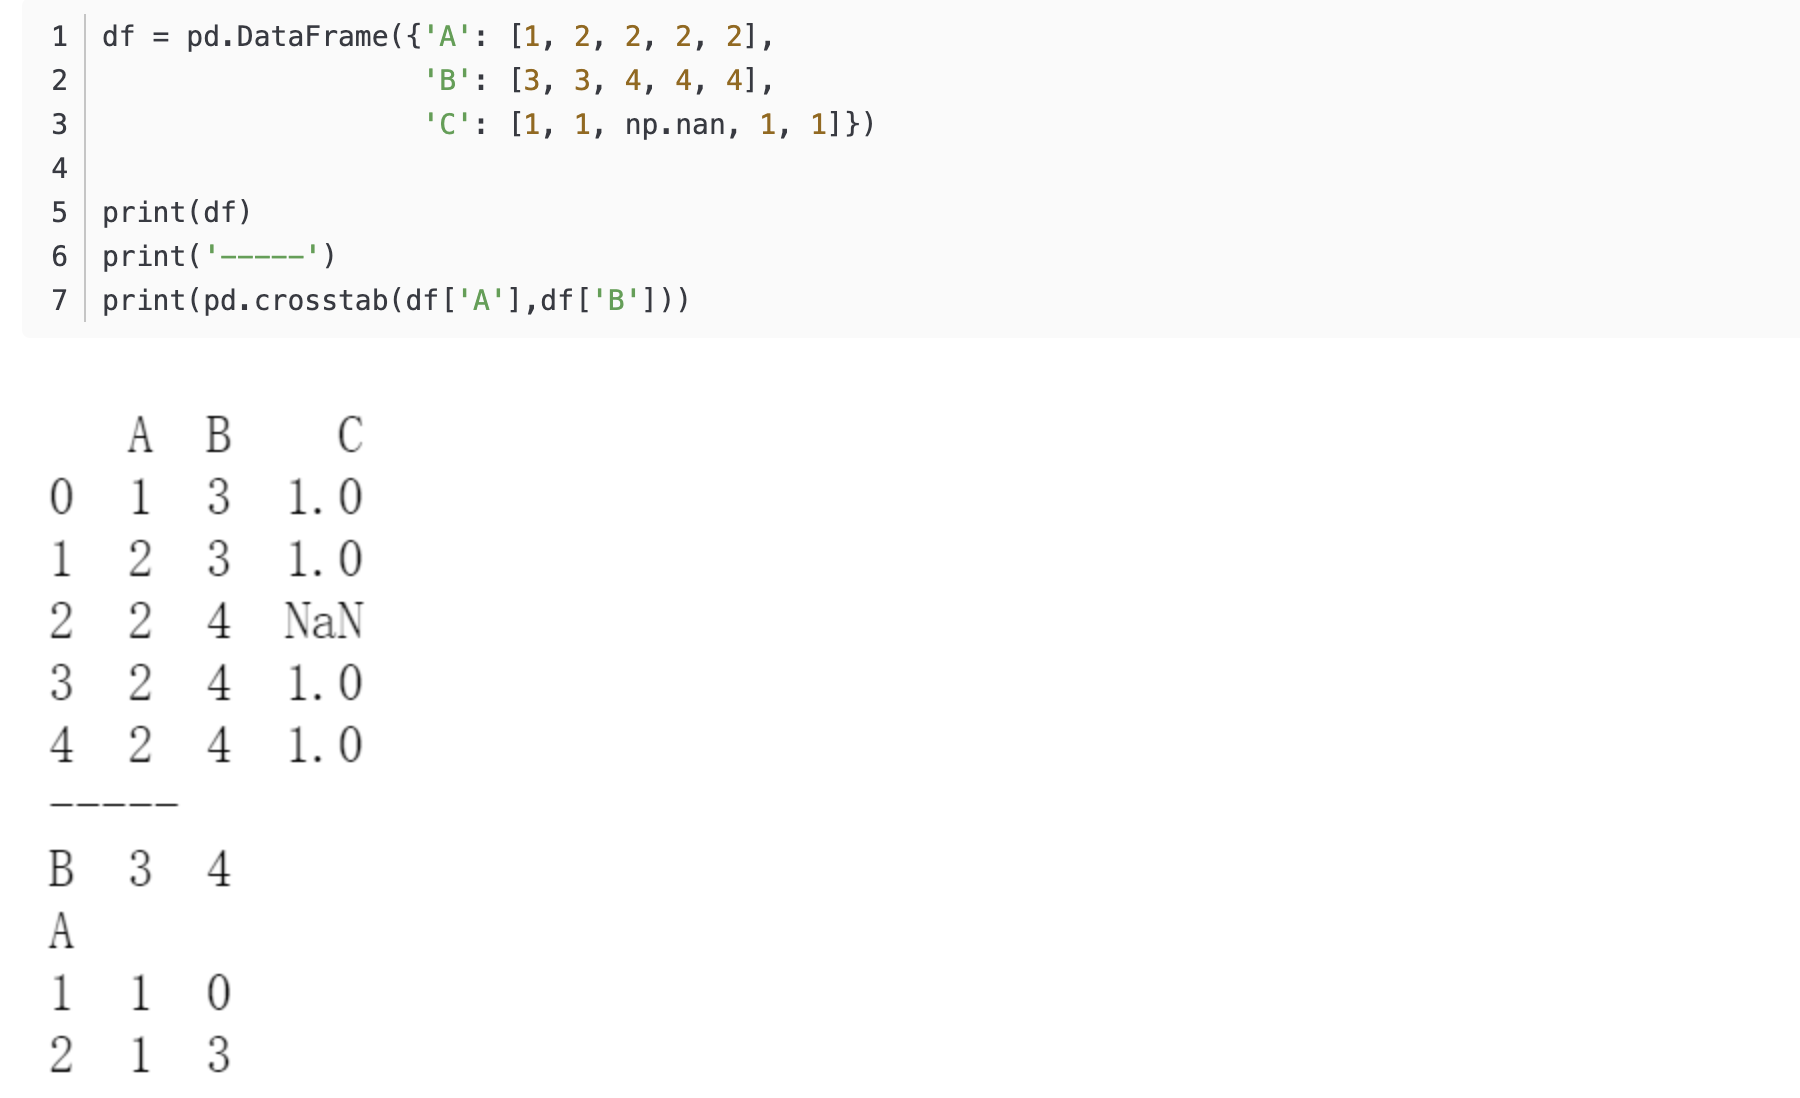

In [217]:
print(train.loc[:,['Survived', 'New_name']].groupby('New_name').mean())

          Survived
New_name          
Master    0.575000
Misc      0.444444
Miss      0.697802
Mr        0.156673
Mrs       0.792000


In [218]:
print(pd.crosstab(train['New_name'], train['Survived']))

Survived    0    1
New_name          
Master     17   23
Misc       15   12
Miss       55  127
Mr        436   81
Mrs        26   99


## 根据图像分析数据

In [232]:
import matplotlib.pyplot as plt

In [237]:
%matplotlib inline

In [242]:
import matplotlib as mpl

In [244]:
mpl.style.use('ggplot')

In [245]:
plt.figure(figsize=[16,12])

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

**箱型图**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f04328727b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0432872048>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0432872c88>],
 'medians': [<matplotlib.lines.Line2D at 0x7f04321e4828>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f043287f240>],
 'means': [<matplotlib.lines.Line2D at 0x7f04321e4b38>]}

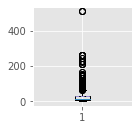

In [246]:
plt.subplot(231)
plt.boxplot(x=train['Fare'], showmeans = True, meanline = True)

画图这部分功能先放一放，因为没有具体分析每个图到底怎么用，到时候还要参考别人的资料

# 数据建模

机器学习算法主要分为：

1. 分类
2. 聚类
3. 降维
4. 回归

本题目的标签类型是离散的，所以选择分类算法

本次将使用 decision tree，boost，bagging，random forest

In [256]:
# 集成方法 ensemble method
from sklearn import ensemble

# 高斯过程
from sklearn import gaussian_process

# 线性模型
from sklearn import linear_model

# 朴素贝叶斯
from sklearn import naive_bayes

# k近邻
from sklearn import neighbors

from sklearn import svm

# 决策树
from sklearn import tree

# 线性判别分析模型
from sklearn import discriminant_analysis

import xgboost

In [257]:
# 创建一个列表，放置所有模型实例
# machine learing algorithm
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    gaussian_process.GaussianProcessClassifier(),
    
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    xgboost.XGBClassifier()
    
]